<a href="https://colab.research.google.com/github/rashwinr/MONAI_tutorials/blob/main/MONAI_Networks_LossFunctions_DataLoaders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MONAI: Networks, DataLoader, and Loss Functions**

## Introduction to Model and Loss Function

### What does a model do?
<a href="https://www.pycodemates.com/2023/02/backpropagation-and-gradient-descent-simplified.html">
<img src="https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEiHKxQ3QXBha8JvveVU59HKbCklvvQut8vtVNMWMS0C4wHQZdaRWR_L0nL2IOrUZ6Brmmty8pEj1FAz6z-0F8_JZApvW5te_mwzcLFSnE5Zuy2Arc3dKADo9Eq__0WROHHdJ7bBvTdZFb0tD5O4e3Zs1EPIr79rlmkwsPni2SfPqxAvszumdZjRZgSGTw/s1152/Forward%20Propagation%20Neural%20Network%20Animation%20(2).gif"/>
</a>

Wrt. to above image, let $X_{1}$ be the input image and $O_{2}$ be the model output, then the model $M$ are the parameters $[W_{1} ,  b_{1};W_{2} , b_{2}]$  



### What does a loss function do?
It computes the error or difference between the $Y_{1}$ (desired or designated output) and $O_{2}$ (model output).
- The computed loss is used by the *optimizer* to update the weights and biases of the model $M$, such that $Y_{1}\equiv O_{2}$.

An example of how the loss calculation and backpropogation happens in a loop is visualized below:
<center><img src="https://miro.medium.com/max/2628/1*YHM9vCaEf8pmdBycuW4wrg.gif"/></center>



### Models could get very complex

<center>
<a href="https://tikz.net/neural_networks/">
<img src="https://tikz.net/wp-content/uploads/2021/12/neural_networks.gif" />
</a>
</center>

- This image is an example of how complex a network or model will get and it is very difficult to compute manually

- Today we will be looking at PyTorch and MONAI, the tools that will make our life easy in selecting and using pre-built network architectures.

## Applications of Deeplearning in Medical Image Analysis



### Image classification

- Image classification using deep learning involves training a convolutional neural network (CNN) on a large dataset of labeled images.
- The CNN learns to extract relevant features from the images and classify them into predefined categories.
- The model shown below takes in a $28\times28$ image as input and provides $0 - 9$ output

<center>
<a href="https://www.analyticsvidhya.com/blog/2021/07/convolution-neural-network-better-understanding/">
<img src="https://editor.analyticsvidhya.com/uploads/95577cnn2.gif" />
</a>
</center>




### Image segmentation

-  Image segmentation involves dividing an image into multiple segments or regions
- These segments correspond to meaningful parts of the image, such as objects, features, or regions with similar characteristics

The image below shows a label of a human lung being annotated by a human for deep learning applications
<center>
<a href="">
<img src="https://imerit.net/wp-content/uploads/2023/09/med-ai-polygon-annotation-video-1.gif"/>
</a>
</center>

The image below shows the output of medcial segment anything model (MedSAM) that is capable of segmenting lesions and tumors from any imaging modality by using a prompt

<center>
<a href="https://arxiv.org/pdf/2304.12306">
<img src="https://www.researchgate.net/publication/370227344/figure/fig1/AS:11431281153293472@1682392187086/Visualized-examples-of-the-pre-trained-SAM-and-MedSAM-segmentation-results-MedSAM.ppm"/>
</a>
</center>


## Convolutional Neural Networks (CNN)

<center>
<a href="https://indiantechwarrior.com/convolution-layers-in-convolutional-neural-network/">
<img src="https://cdn-media-1.freecodecamp.org/images/gb08-2i83P5wPzs3SL-vosNb6Iur5kb5ZH43" />
</a>
</center>

Let us explore convolution with this Interactive Tool: [convolution-visualizer](https://ezyang.github.io/convolution-visualizer/)

- **Input Image Size**: The dimensions (height and width) of the image fed into the CNN layer.
- **Padding**: Extra border of pixels added around the input image.
- **Stride**: The number of pixels the filter shifts over the input image in each step.
- **Dilation**: Spacing between the values in a kernel, increasing the receptive field without increasing the kernel size.
- **Kernel/Filter Size**: The dimensions of the filter that slides across the input image, extracting features.
- **Output Image Size**: The dimensions of the feature maps produced by the CNN layer after applying the convolution operation.

**Formula**

Here's a common formula to calculate the output size (O) based on the input size (I), padding (P), stride (S), dilation (D), and kernel size (K):

$$ O = \frac{(I + 2P - D(K - 1) - 1)}{S} + 1 $$


## MaxPooling
- Max pooling helps reduce the dimensions of feature maps by selecting the maximum value from each pooling window

<center>
<a href="https://velog.io/@mykirk98/Pooling-Layer">
<img src="https://miro.medium.com/proxy/1*lRVHY6UXH7K5sfr9L_YVvg.gif" />
</a>
</center>


## Installing dependencies

In [ ]:
!pip show monai

Name: monai
Version: 1.4.0
Summary: AI Toolkit for Healthcare Imaging
Home-page: https://monai.io/
Author: MONAI Consortium
Author-email: monai.contact@gmail.com
License: Apache License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, torch
Required-by: 


In [ ]:
!pip install monai[all]
import monai
monai.__version__

'1.4.0'

## MONAI: Network Architectures

- Blocks: MONAI provides flexible and customizable network architecture blocks like Convolution, Attention, and UpSample, which can be easily combined to build complex medical image analysis models
- Nets: MONAI offers a collection of pre-built network architectures like UNet, SegResNet, and DynUNet, readily available for common medical image analysis tasks

### Create dummy image

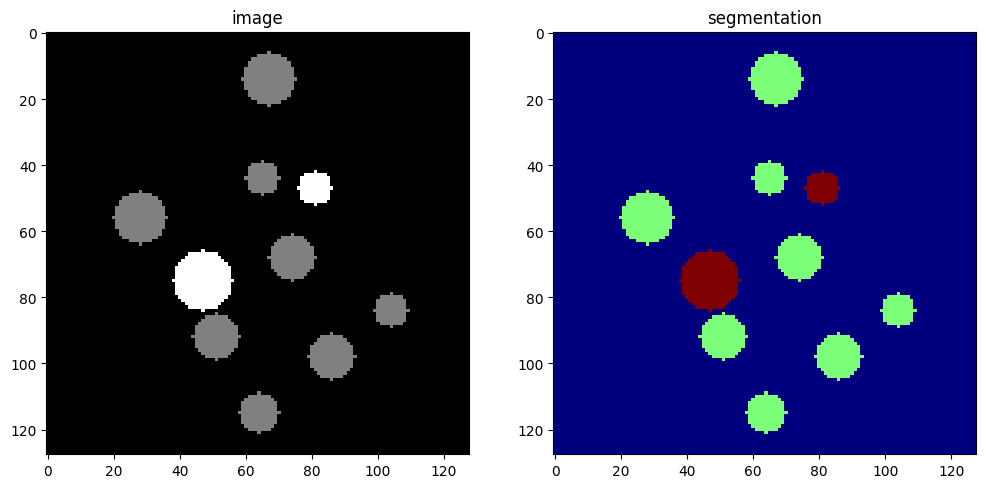

The shape of the image: (128, 128)
The shape of the segmentation: (128, 128)


In [ ]:
import monai
import matplotlib.pyplot as plt
from monai.data import create_test_image_2d

# Create a 2D image of 128x128 with 2 classes
im, seg = create_test_image_2d(128, 128, num_seg_classes=2,rad_max=10,num_objs=10)

# Display the image and segmentation
plt.figure("test image", (12, 6))
plt.subplot(1, 2, 1)
plt.title("image")
plt.imshow(im, cmap="gray")
plt.subplot(1, 2, 2)
plt.title("segmentation")
plt.imshow(seg, cmap="jet")
plt.show()
print(f"The shape of the image: {im.shape}")
print(f"The shape of the segmentation: {seg.shape}")

### Create MONAI dataset & transforms

In [ ]:
import numpy as np
from monai.data import Dataset
from monai.transforms import Compose, EnsureChannelFirstd, ToTensord, ScaleIntensityd

# Assuming 'im' and 'seg' are already defined from the previous code

# Create a list of dictionaries, where each dictionary represents a data sample.
data_dicts = [
    {"image": im, "label": seg}
]


# Define transformations
transforms = Compose([
    EnsureChannelFirstd(keys=["image","label"],channel_dim="no_channel"),  # Adds a channel dimension to the image and segmentation
    EnsureChannelFirstd(keys=["image","label"],channel_dim="no_channel"),  # Adds a channel dimension to the image and segmentation
    ScaleIntensityd(keys=["image"]),  # Scales the intensity values of the image to the range [0, 1]
    ToTensord(keys=["image","label"])     # Converts NumPy arrays to PyTorch tensors
])

# Create the MONAI dataset
dataset = Dataset(data=data_dicts, transform=transforms)

# Access data sample from the dataset
check_data = dataset[0]
image, label = check_data["image"], check_data["label"]

print(f"Shape of image after transform: {image.shape}")
print(f"Shape of label after transform: {label.shape}")
print(f"Type of image after transform: {type(image)}")
print(f"Type of label after transform: {type(label)}")


Shape of image after transform: torch.Size([1, 1, 128, 128])
Shape of label after transform: torch.Size([1, 1, 128, 128])
Type of image after transform: <class 'monai.data.meta_tensor.MetaTensor'>
Type of label after transform: <class 'monai.data.meta_tensor.MetaTensor'>


### Convolution

More details: https://docs.monai.io/en/stable/networks.html#convolution


In [ ]:
#Defining a convolution
from monai.networks.blocks import Convolution

conv = Convolution(
    spatial_dims=2,
    in_channels=1,
    out_channels=1,
)

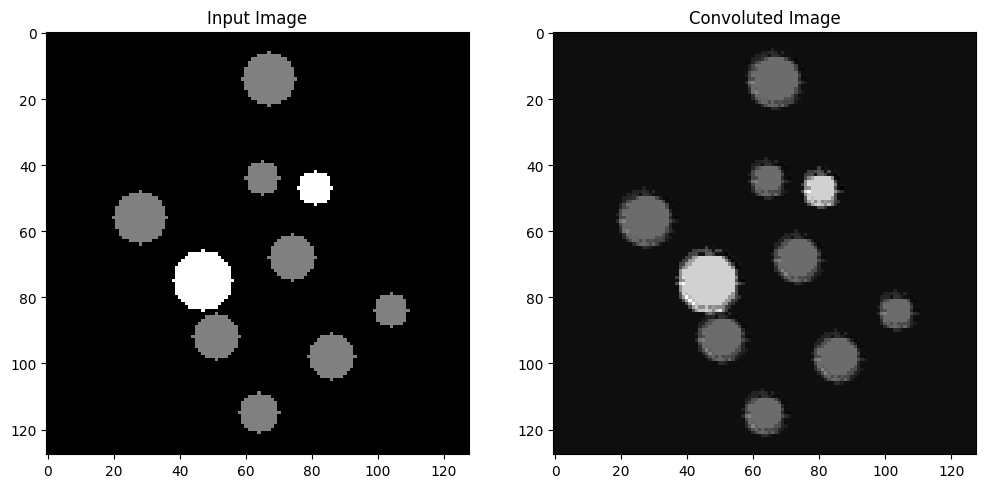

Input image size: torch.Size([1, 1, 128, 128])
Convoluted image size: torch.Size([1, 1, 128, 128])


In [ ]:
# Apply convolution to the image
conv_output = conv(image)

# Display the input image and the convolved image
plt.figure("Input vs Convoluted Image", (12, 6))
plt.subplot(1, 2, 1)
plt.title("Input Image")
plt.imshow(np.squeeze(image.numpy()), cmap="gray")  # Remove channel dimension for display
plt.subplot(1, 2, 2)
plt.title("Convoluted Image")
plt.imshow(np.squeeze(conv_output.detach().numpy()), cmap="gray")  # Remove channel dimension for display and detach from computation graph
plt.show()


# Print the sizes of the input image and the convolved image
print(f"Input image size: {image.shape}")
print(f"Convoluted image size: {conv_output.shape}")

### MaxAvgPooling

more details: https://docs.monai.io/en/stable/networks.html#maxavgpooling

Input image size: torch.Size([1, 1, 128, 128])
MaxAvgPool image size: torch.Size([1, 2, 64, 64])


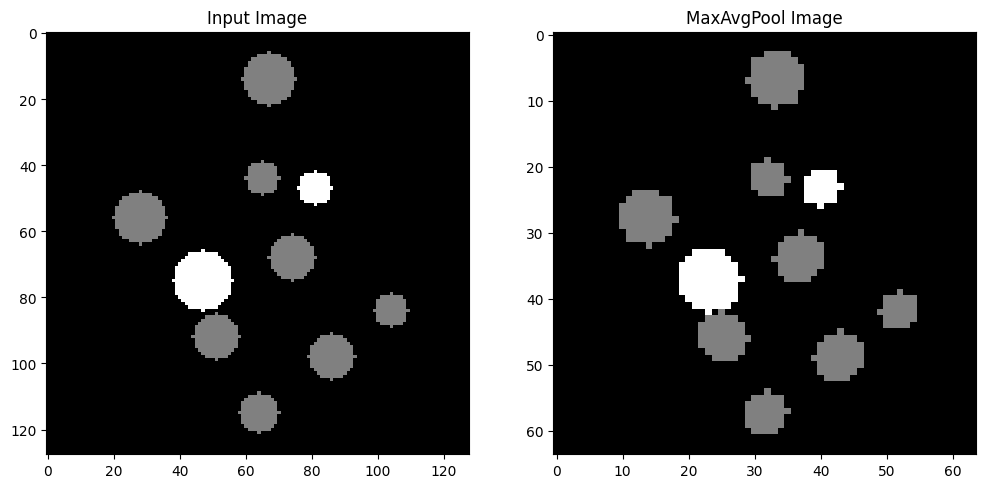

In [ ]:
from monai.networks.blocks import MaxAvgPool

# Define MaxAvgPool with spatial_dims=2 and kernel_size=2.
maxavgpool = MaxAvgPool(spatial_dims=2, kernel_size=(2,2),stride=(2,2))

# Apply maxavgpool to the image
maxavgpool_output = maxavgpool(image)

# Print the sizes of the input image and the maxavgpool output
print(f"Input image size: {image.shape}")
print(f"MaxAvgPool image size: {maxavgpool_output.shape}")

# Display the input image and the maxavgpool output
plt.figure("Input vs MaxAvgPool Image", (12, 6))
plt.subplot(1, 2, 1)
plt.title("Input Image")
plt.imshow(np.squeeze(image.numpy()), cmap="gray")
plt.subplot(1, 2, 2)
plt.title("MaxAvgPool Image")
plt.imshow(np.squeeze(maxavgpool_output.detach().numpy()[0,0,:,:]), cmap="gray")
plt.show()



### Classification Models

<center>
<a href="https://arxiv.org/abs/1608.06993">
<img src="https://th.bing.com/th/id/OIP.kNGEXTvcgXPqztCwKbNvUwHaFM?pid=ImgDet&w=474&h=332&rs=1"/>
</a>
</center>

More details: https://docs.monai.io/en/stable/networks.html#densenet

In [ ]:
from monai.networks.nets import DenseNet121

# Define the DenseNet model with specified parameters
model = DenseNet121(
    spatial_dims=2,
    in_channels=1,
    out_channels=2,
)

print(model)

DenseNet121(
  (features): Sequential(
    (conv0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (layers): Sequential(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
      )
      (denselayer2): _DenseLayer(
        (layers): Sequential(
          (norm1): BatchN

### Segmentation Models

The image below shows an UNet architecture popular for medical image segmentation

<center>
<a href="https://arxiv.org/abs/1505.04597">
<img src="https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png"/>
</a>
</center>

In [ ]:
from monai.networks.nets import BasicUNet

# Define the UNet model with specified parameters
model = BasicUNet(
    spatial_dims=2,
    in_channels=1,
    out_channels=1,
)

# print(model)


BasicUNet features: (32, 32, 64, 128, 256, 32).


## MONAI: Loss Functions

- MONAI offers specialized loss functions like Dice Loss, Focal Loss, etc.,tailored for various medical image analysis tasks, including segmentation and classification.

- syntax 1: ```loss_function=DiceLoss()```
- syntax 2: ```loss = loss_function(output,label)```

Visualizing Dice & IoU:
<center>
<a href="https://learnopencv.com/deep-learning-based-document-segmentation-using-semantic-segmentation-deeplabv3-on-custom-dataset/">
<img src="https://learnopencv.com/wp-content/uploads/2022/08/05-document-segmentation-IoU-Dice-concept.png"/>
</a>
<center>




In [ ]:
#Diceloss works well in segmentation tasks
#Cross entropy works well in classification tasks

import torch
from monai.losses import GeneralizedDiceLoss, DiceCELoss, FocalLoss, DiceLoss

# Create a random tensor of size 1, 1, 128, 128 of float32
random_tensor = torch.randn(1, 1, 128, 128, dtype=torch.float32)

# Create a target tensor (example: all zeros)
target_tensor = torch.zeros(1, 1, 128, 128, dtype=torch.float32)


#O/p=[1 (0.2) or 0 (0.6)] #[1]


loss_function_monai = DiceCELoss(lambda_dice=0.0, lambda_ce=1.0)


loss_monai = loss_function_monai(model_output, label)

# Compute the loss using torch
loss_torch = torch.nn.BCEWithLogitsLoss()(conv_output, image)

print(f"Loss with Torch: {loss_torch.item()} and loss with monai: {loss_monai.item()}")

Loss with Torch: 0.8047244548797607 and loss with monai: 0.8047244548797607


In [ ]:
class diceloss(torch.nn.Module):
    def init(self):
        super(diceLoss, self).init()
    def forward(self,pred, target):
       smooth = 10^-5
       iflat = pred.contiguous().view(-1)
       tflat = target.contiguous().view(-1)
       intersection = (iflat * tflat).sum()
       A_sum = torch.sum(iflat * iflat)
       B_sum = torch.sum(tflat * tflat)
       diceloss = 1-((2. * intersection + smooth) / (A_sum + B_sum + smooth) )
       return diceloss

In [ ]:
criterion=diceloss()
loss_dice=criterion(target_tensor,target_tensor)
loss_dice_monai = DiceLoss()
diceloss_monai = loss_dice_monai(target_tensor,target_tensor)
print(f"Loss with Torch: {loss_dice.item()} and loss with monai: {diceloss_monai.item()}")

Loss with Torch: 0.0 and loss with monai: 0.0


## MONAI DataLoader
- MONAI's DataLoader efficiently handles loading and preprocessing medical image data
- This streamlines the process of feeding data into your AI models for training or inference
- syntax: ```DataLoader(dataset, batch_size=16, num_workers=2)```

<center><img src="https://i.makeagif.com/media/11-13-2023/yY1wrp.gif"/></center>


In [ ]:
from monai.data import DataLoader

# Create a DataLoader with specified parameters
dataloader = DataLoader(dataset, batch_size=1, num_workers=1)

# Iterate through the DataLoader to access data in batches
for batch_data in dataloader:
  # Access images and labels for the current batch
  images = batch_data["image"]
  labels = batch_data["label"]

  # Now you can use 'images' and 'labels' for your model training

  print(f"Shape of images in a batch:{images.shape}")
  print(f"Shape of labels in a batch:{labels.shape}")
  break # example: only processes one batch

Shape of images in a batch:torch.Size([1, 1, 1, 128, 128])
Shape of labels in a batch:torch.Size([1, 1, 1, 128, 128])


## Tasks

Practicing these tasks will get you quickly acquianted with the concepts.

### Task1

Create an array of 100 images with segmentation using ```create_test_image_2d```

In [ ]:
from monai.data import create_test_image_2d
img= []
seg=[]
for i in range(100):
  image,label = create_test_image_2d(128, 128, num_seg_classes=2,rad_max=10,num_objs=5)
  img.append(image)
  seg.append(label)

print(f"The shape of the image: {img[0].shape}")
print(f"The shape of the segmentation: {seg[0].shape}")
print(f"The number of images in image list is: {len(img)}")
print(f"The number of images in segmentation list is: {len(seg)}")

The shape of the image: (128, 128)
The shape of the segmentation: (128, 128)
The number of images in image list is: 100
The number of images in segmentation list is: 100


### Task2

Create a DataLoader of a suitable size for loading the data, print its size and shape of the image

In [ ]:
from monai.data import Dataset, DataLoader
from monai.transforms import Compose, EnsureChannelFirstd, ToTensord, ScaleIntensityd

# Create a list of dictionaries, where each dictionary represents a data sample.
data_dictionary=[]
for i in range(len(img)):
  data_dictionary.append({"image": img[i], "label": seg[i]})

transform=Compose([
    EnsureChannelFirstd(keys=["image","label"],channel_dim="no_channel"),  # Adds a channel dimension to the image and segmentation
    ScaleIntensityd(keys=["image"]),  # Scales the intensity values of the image to the range [0, 1]
    ToTensord(keys=["image","label"])     # Converts NumPy arrays to PyTorch tensors
]
)

dataset = Dataset(data=data_dictionary, transform=transform)

# Create a DataLoader with specified parameters
dataloader = DataLoader(dataset, batch_size=8, num_workers=1)

print(f"The size of the dataloader is: {len(dataloader)}")

for batch_data in dataloader:
  # Access images and labels for the current batch
  images = batch_data["image"]
  labels = batch_data["label"]

The size of the dataloader is: 13


### Task3

Create a model for classification of the image and another model for segmentation of the image

In [ ]:
from monai.networks.nets import DenseNet121
from monai.networks.nets import BasicUNet

# Define the DenseNet model with specified parameters
model_classification = DenseNet121(
    spatial_dims=2,
    in_channels=1,
    out_channels=2,
)

model_segmentation = BasicUNet(
    spatial_dims=2,
    in_channels=1,
    out_channels=1,
)

BasicUNet features: (32, 32, 64, 128, 256, 32).


### Task4

Compute the loss (Dice, crossentropy) for one batch between segmentation image and output of the model.

In [ ]:
for batch_data in dataloader:
  # Access images and labels for the current batch
  images = batch_data["image"]
  labels = batch_data["label"]
  model_output = model_segmentation(images)
  loss_function_monai = DiceCELoss(lambda_dice=0.0, lambda_ce=1.0)
  loss_monai = loss_function_monai(model_output, labels)
  print(f"Cross entropy Loss with monai: {loss_monai.item()}")
  diceloss_function_monai = DiceLoss()
  diceloss_monai = diceloss_function_monai(model_output, labels)
  print(f"Dice Loss with monai: {diceloss_monai.item()}")
  break

Cross entropy Loss with monai: 0.7700809240341187
Dice Loss with monai: 2.083326816558838
